<a href="https://colab.research.google.com/github/muhammed-sajid/Machine-Learning/blob/main/Z_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('ABC company.csv')

df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [3]:
df.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,11


In [4]:
median = df['Salary'].median()
median

2836186.0

In [5]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [6]:
df['Salary'] = df['Salary'].fillna(median)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,2836186.0
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [7]:
df.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,0


<ipython-input-19-bc20e5e6d548>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

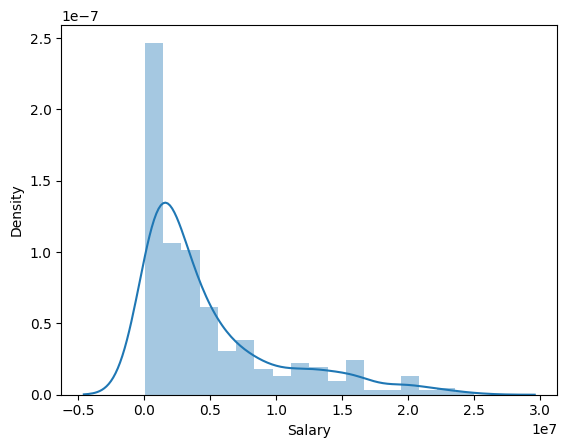

In [19]:
sns.distplot(df['Salary'])

<Axes: ylabel='Salary'>

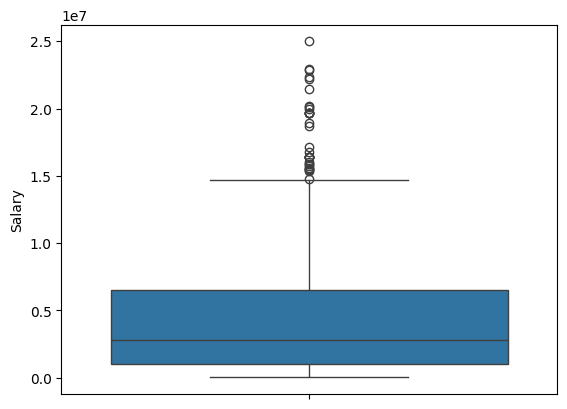

In [20]:
#to see outliers clearly
sns.boxplot(df['Salary'])

In [8]:
upper_bound = df['Salary'].mean() + 3 * df['Salary'].std()
lower_bound = df['Salary'].mean() - 3 * df['Salary'].std()
print("UPPER BOUND:", upper_bound)
print("LOWER BOUND:", lower_bound)

UPPER BOUND: 20303206.58143315
LOWER BOUND: -10731230.891476817


In [11]:
#find outliers
df.loc[(df['Salary'] > upper_bound) | (df['Salary'] < lower_bound)]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
33,Carmelo Anthony,New York Knicks,7,SF,32,06-Aug,240,Syracuse,22875000.0
100,Chris Paul,Los Angeles Clippers,3,PG,31,6-0,175,Wake Forest,21468695.0
109,Kobe Bryant,Los Angeles Lakers,24,SF,37,06-Jun,212,NaN,25000000.0
169,LeBron James,Cleveland Cavaliers,23,SF,31,06-Aug,250,NaN,22970500.0
251,Dwight Howard,Houston Rockets,12,C,30,06-Nov,265,NaN,22359364.0
339,Chris Bosh,Miami Heat,1,PF,32,06-Nov,235,Georgia Tech,22192730.0


In [15]:
#trimming- delete the outlier data
new_df = df.loc[(df['Salary'] < upper_bound) & (df['Salary'] > lower_bound)]
print("Before Removing outliers",len(df))
print("After Removing outliers",len(new_df))
print("Outliers",len(df)-len(new_df))

Before Removing outliers 458
After Removing outliers 441
Outliers 17


<Axes: ylabel='Salary'>

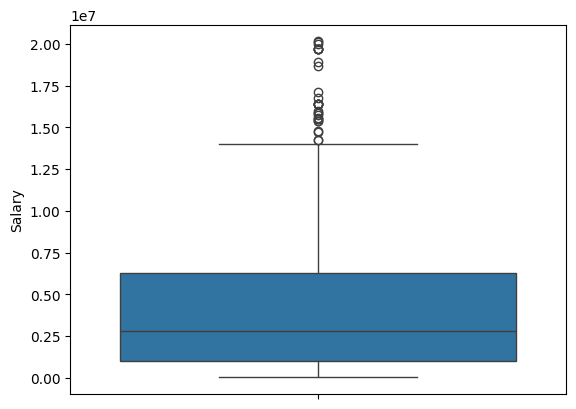

In [21]:
sns.boxplot(new_df['Salary'])

In [22]:
#capping - change the outlier value to upper (or)  lower limit values
new_df = df.copy()
new_df.loc[(new_df['Salary'] > upper_bound), 'Salary'] = upper_bound
new_df.loc[(new_df['Salary'] < lower_bound), 'Salary'] = lower_bound

<Axes: ylabel='Salary'>

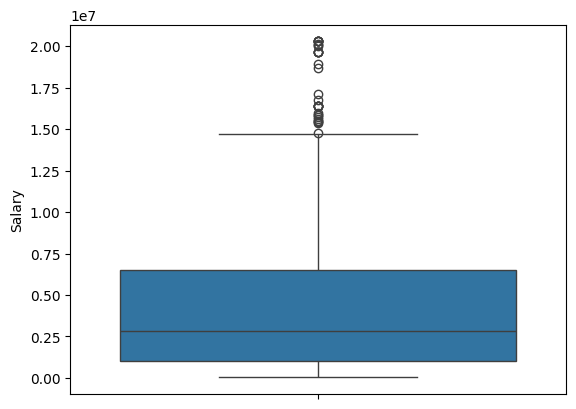

In [23]:
sns.boxplot(new_df['Salary'])